In [1]:
import torch
from torchvision import ops
from PIL import Image, ImageDraw, ImageFont
from typing import Tuple
import random
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import copy
import cv2

In [2]:
def plot_img(img, size=(8, 8)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#### Text on image

In [3]:
from src.gen_box import gen_imgInteval, random_multi_boxes, box_gen, get_box_size
from src.gen_color import gen_text_color_v2, gen_text_color
from src.fill_text import fill_text_to_image, draw_rectangle
import numpy as np


In [4]:
def text_gen():
    #Texts load
    texts_path = "./train_trg.txt"
    with open(texts_path,"r",encoding="utf-8") as f:
        text = random.choice(f.readlines()).strip('\n')
        # texts_data = [x.strip('\n') for x in f.readlines()]
    
    return text
    
def plot_img(img, size=(8, 8)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()




In [5]:
font_path = "./data/font/Archivo-Regular.ttf"
bg_path = "./data/background/000000579902.jpg"
MAX_SIZE = (2048, 2048)
image = Image.open(bg_path)
image.thumbnail(MAX_SIZE)
print(image.size)
np_image = np.array(image)
w, h = image.size
font = ImageFont.truetype(font_path, size=50)

(556, 640)


In [6]:
x = "asdasd"
x.split(" ")

['asdasd']

In [7]:
imageIntegral = gen_imgInteval(np_image)

In [8]:
boxes_dict = random_multi_boxes(image_size = image.size, 
                    imageIntegral = imageIntegral,
                    n = 30, 
                    font_list = [font],
                    scale = (0.02, 0.3),
                    font_range = (5, 100),
                    max_intergral = 50)

boxes_dict[0].keys()

dict_keys(['box', 'text', 'words', 'word_boxes', 'fontsize', 'font'])

In [9]:
new_boxes_dict = []
for box_dict in boxes_dict:
    bbox = box_dict['box']
    x1 = int(bbox[0])
    y1 = int(bbox[1])
    x2 = int(bbox[2])
    y2 = int(bbox[3])
    # box_dict['text_color'] = gen_text_color(np_image[y1:y2, x1:x2], max_diff = 5)
    box_dict['text_color'] = gen_text_color_v2(np_image[y1:y2, x1:x2], min_text_bg_rate = 3)
    if box_dict['text_color'] is None:
        continue
    else:
        new_boxes_dict.append(box_dict)
    
len(new_boxes_dict)

11

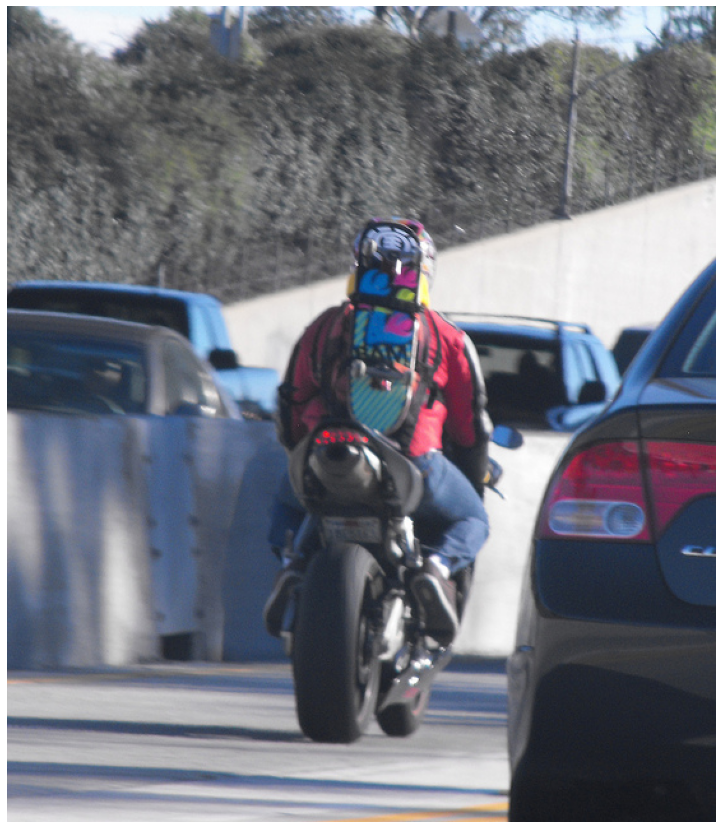

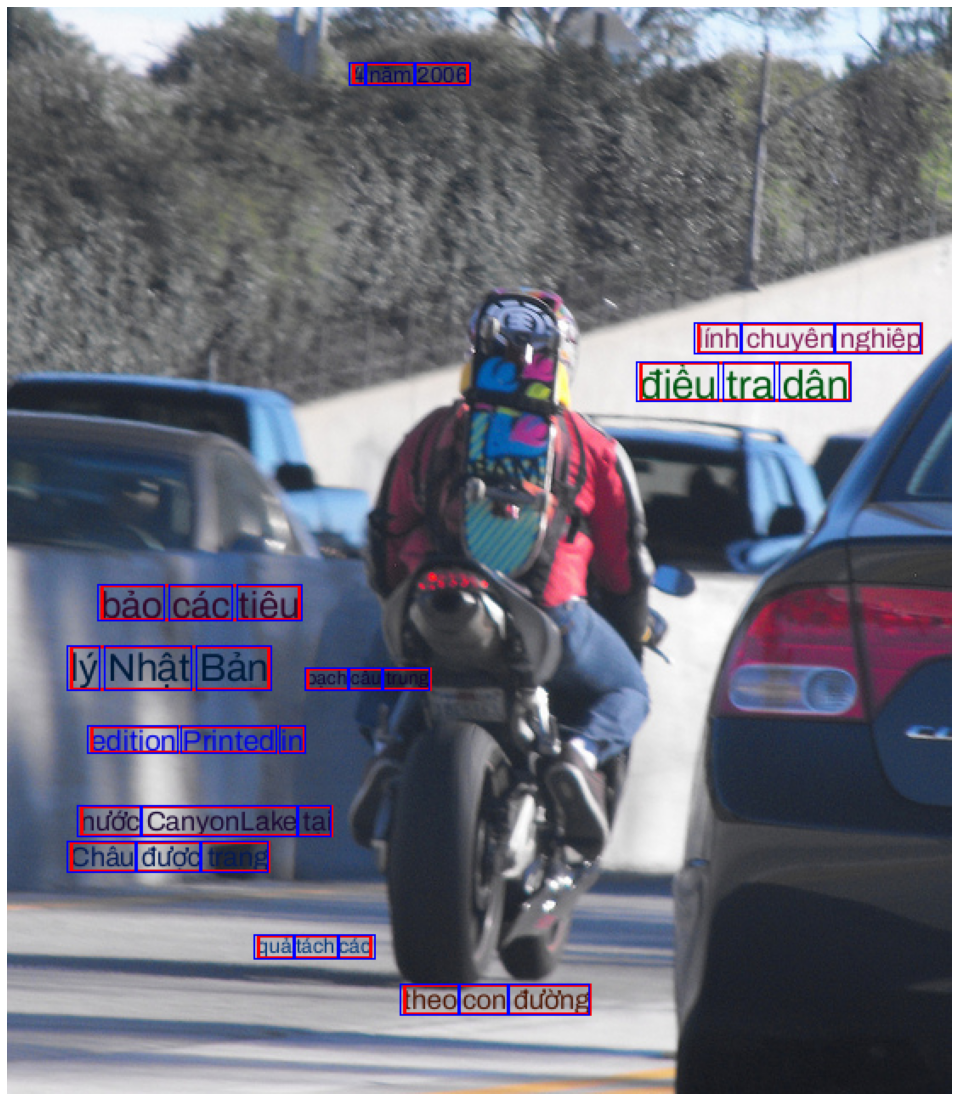

In [11]:
image_copy = image.copy()
plot_img(image_copy, (15, 15))

for box_dict in new_boxes_dict:
    image_copy = fill_text_to_image(image = image_copy,
                       text = box_dict['text'],
                       font = box_dict['font'],
                       textsize = box_dict['fontsize'],
                       box = box_dict['box'],
                       text_color = box_dict['text_color']
                        )
    box = [int(x) for x in box_dict['box'] ]
    image_copy = draw_rectangle(image_copy, box[0], box[1], box[2], box[3], line_width = 2, color = "red")

    for box in box_dict['word_boxes']:
        box = [int(x) for x in  box]
        image_copy = draw_rectangle(image_copy, box[0], box[1], box[2], box[3], line_width = 1, color = "blue")

plot_img(image_copy, (20, 20))


#### Convert Labelme

In [15]:
import json
import os
from PIL import Image
import base64
from tqdm import tqdm
import shutil


In [16]:
in_folder_list = ["/home/phung/AnhHung/data/ocr_data/text_on_bg/labelme1/", "/home/phung/AnhHung/data/ocr_data/text_on_bg/labelme2/"]

out_folder = "/home/phung/AnhHung/data/ocr_data/text_on_bg/labelme/"

In [17]:
count = 1
for folder_path in in_folder_list:
    for filename in tqdm(os.listdir(folder_path)):
        if "json" not in filename:
            continue
        json_path = os.path.join(folder_path, filename)
        name, ext = os.path.splitext(filename)
        
        with open(json_path, "r") as f:
            json_data = json.load(f)
        
        or_img_path = os.path.join(folder_path, f"{name}.jpg")
        new_img_path = os.path.join(out_folder, f"{count:06d}.jpg")
        new_json_path = os.path.join(out_folder, f"{count:06d}.json")
        
        checked_flag = False
        new_shapes = []
        
        json_data['imagePath'] = f"{count:06d}.jpg"

        shutil.copy(or_img_path, new_img_path)
        with open(new_json_path, "w") as out:
            json.dump(json_data, out)
    #     break

        count+=1

100%|██████████| 12540/12540 [00:03<00:00, 3503.79it/s]


# OCR Data Generator

The OCR Data Generator is a model designed to generate synthetic data with OCR (Optical Character Recognition) capabilities. It supports a wide range of fonts and backgrounds for generating diverse datasets. The current features of the model are as follows:

- **Saving Text Detection Data**: The model can save text detection data in the form of straight rectangles, which can be easily read using the labelme tool.
- **Finding Suitable Background Positions**: It utilizes OpenCV's imageIntegral to find appropriate positions in the image for placing the generated text, considering the background context.
- **Color Generation**: The model generates text colors that ensure the text remains distinct from the background color.

## Model Drawbacks

While the OCR Data Generator offers valuable functionality, it has a few limitations:

- **Slow Image Generation Speed**: The speed of image generation can be relatively slow, depending on the specified parameters.
- **Unsuitable Background Placement**: In some cases, the model may struggle to find a suitable area to place the generated text on certain background images.
- **Unlabeled Pre-existing Text**: If the background image already contains text, the model does not label the text in the generated image.

## Instructions for Use

To use the OCR Data Generator, follow these steps:

1. **Install the Package**: Execute the following command to install the required dependencies:
    ```shell
    pip install -r requirements.txt
    ```

2. **Set up Parameters**: Adjust the necessary parameters, input directory, and output directory within the `main.py` file to customize the data generation process.

3. **Run Data Generation**: Execute the following command to start generating the synthetic data:
    ```shell
    python main.py
    ```

Make sure to review the generated data and adapt the parameters as needed to achieve the desired results.